In [3]:
!pip install pandas

In [4]:
import pandas as pd
from datetime import datetime

In [5]:
df = pd.read_csv('dados_de_entrada/SC.csv', sep=',', encoding='latin1')
df

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
0,2023,1,1,0,30,Capivari de Baixo,SC_002,PTS,20.0000,ug/m3,Automatica,Referencia
1,2023,1,1,1,30,Capivari de Baixo,SC_002,PTS,17.0000,ug/m3,Automatica,Referencia
2,2023,1,1,2,30,Capivari de Baixo,SC_002,PTS,21.0000,ug/m3,Automatica,Referencia
3,2023,1,1,3,30,Capivari de Baixo,SC_002,PTS,16.0000,ug/m3,Automatica,Referencia
4,2023,1,1,4,30,Capivari de Baixo,SC_002,PTS,17.0000,ug/m3,Automatica,Referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
201475,2023,12,31,19,30,Vila Moema,SC_001,CO,0.0805,ppm,Automatica,Referencia
201476,2023,12,31,20,30,Vila Moema,SC_001,CO,0.0929,ppm,Automatica,Referencia
201477,2023,12,31,21,30,Vila Moema,SC_001,CO,0.1171,ppm,Automatica,Referencia
201478,2023,12,31,22,30,Vila Moema,SC_001,CO,0.1650,ppm,Automatica,Referencia


In [6]:
filtred_so2_df = df.loc[
(df['Poluente'] == 'SO2') &
(df['Codigo'] == 'SC_001') &
(df['Valor'] >= 0)
]

filtred_so2_df.loc[:, 'Date'] = df[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].apply(lambda x: datetime(x['Ano'], x['Mes'], x['Dia'], x['Hora'], x['Minuto']), axis=1)

filtred_so2_df = filtred_so2_df.set_index('Date')

filtred_so2_df = filtred_so2_df[['Valor', 'Unidade', 'Tipo', 'Testacao']]
filtred_so2_df

C:\Users\najuw\AppData\Local\Temp\ipykernel_19200\1493390797.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtred_so2_df.loc[:, 'Date'] = df[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].apply(lambda x: datetime(x['Ano'], x['Mes'], x['Dia'], x['Hora'], x['Minuto']), axis=1)


,Valor,Unidade,Tipo,Testacao
Date,,,,
2023-01-01 00:30:00,4.23,ug/m3,Automatica,Referencia
2023-01-01 01:30:00,4.18,ug/m3,Automatica,Referencia
2023-01-01 02:30:00,4.21,ug/m3,Automatica,Referencia
2023-01-01 03:30:00,3.86,ug/m3,Automatica,Referencia
2023-01-01 04:30:00,3.97,ug/m3,Automatica,Referencia
...,...,...,...,...
2023-12-31 14:30:00,0.46,ug/m3,Automatica,Referencia
2023-12-31 15:30:00,0.15,ug/m3,Automatica,Referencia
2023-12-31 21:30:00,10.18,ug/m3,Automatica,Referencia


In [7]:
filtred_so2_df.describe()

,Valor
count,6407.000000
mean,8.664302
std,21.304276
min,0.000000
25%,1.715000
50%,3.580000
75%,6.190000
max,446.030000


# Respostas

In [8]:
!pip install matplotlib

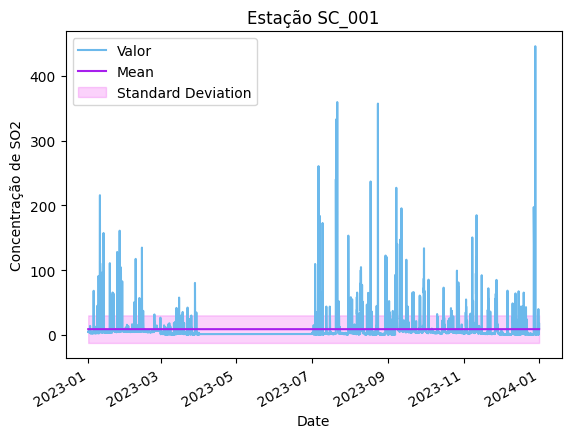

In [9]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

ax = filtred_so2_df['Valor'].plot(ylabel='Concentração de SO2', color='#6CB9EB')
plt.title(label= 'Estação SC_001')

mean = filtred_so2_df['Valor'].mean()
std = filtred_so2_df['Valor'].std()
number_elements = len(filtred_so2_df['Valor'])

ax.fill_between(
    filtred_so2_df.index, number_elements * [mean - std], number_elements * [mean + std],
    color='#EB1FED', alpha=.2)


mean_df = filtred_so2_df[['Valor']].copy()
mean_df.loc[:, 'Mean'] = mean
mean_df = mean_df[['Mean']]
mean_df.plot(ax=ax, color='#A71FED')


std_legend = mpatches.Patch(color='#EB1FED', alpha=.2)
handles, labels = ax.get_legend_handles_labels()
handles.append(std_legend)
labels.append('Standard Deviation')
ax.legend(handles, labels)

(a) A média é de 8.664302
(b) Valor do meio: 3.58
(c) A faixa de valores entre 25% e 75% é: 1.715 e 6.190